In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("station_data_dataverse.csv")
data

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,1,2,0,0,0,1,0,0,0,1


NameError: ignored

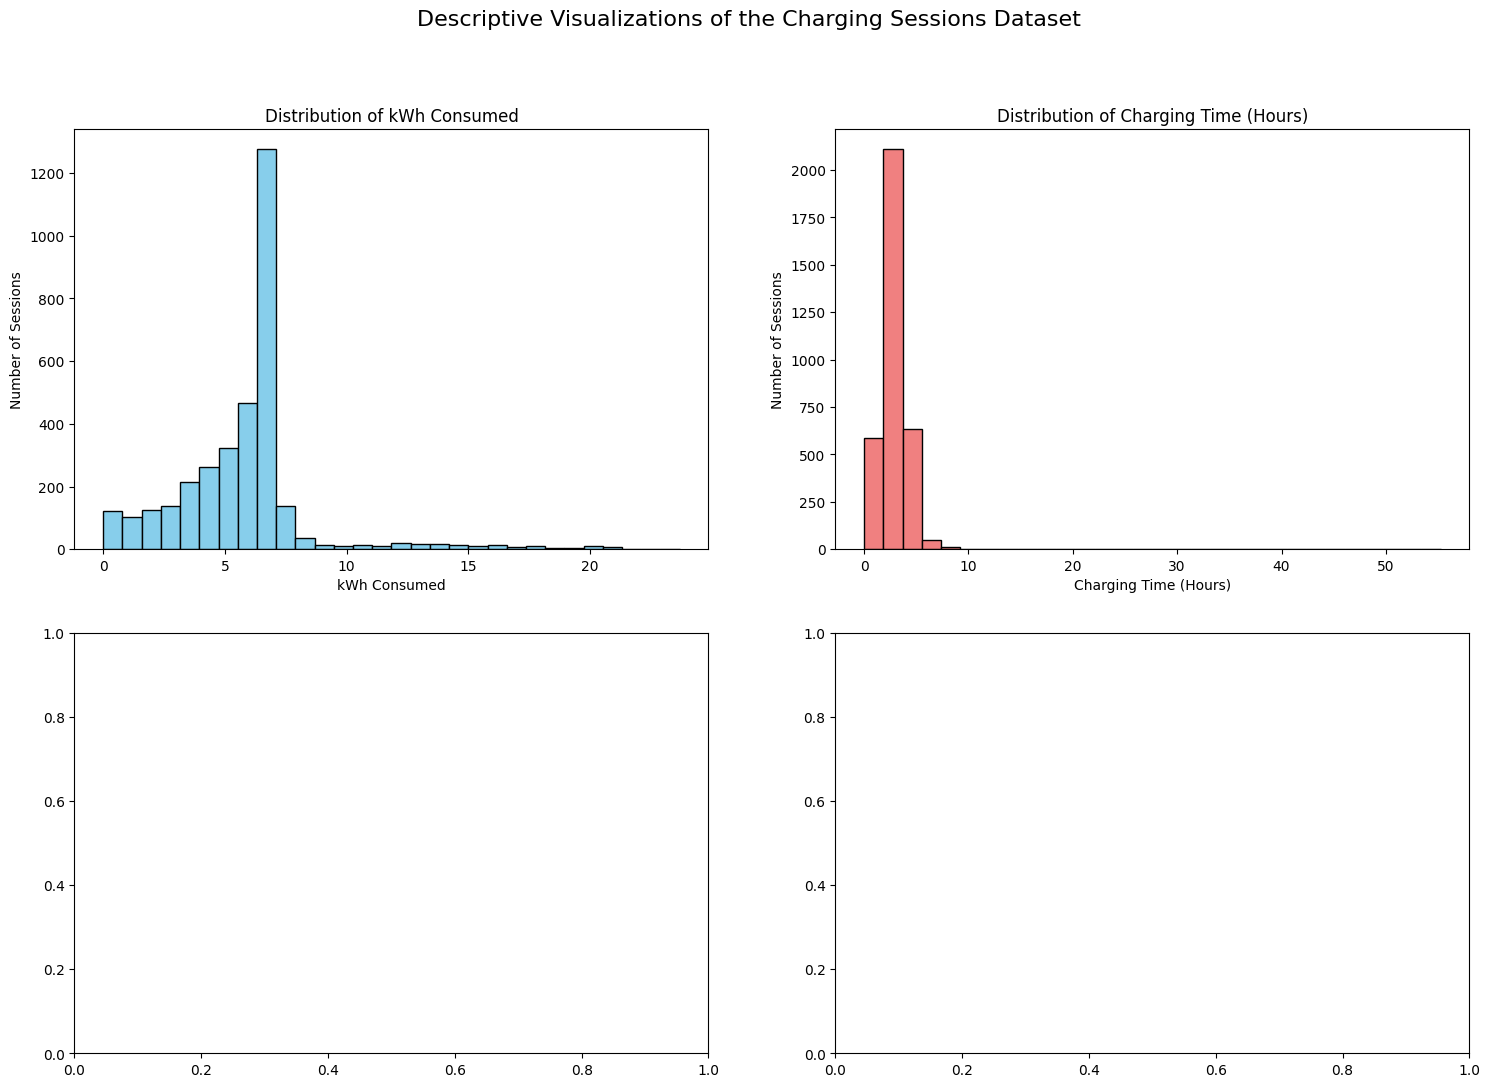

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Descriptive Visualizations of the Charging Sessions Dataset', fontsize=16)

# Histogram for kWh Consumed
axs[0, 0].hist(data['kwhTotal'], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of kWh Consumed')
axs[0, 0].set_xlabel('kWh Consumed')
axs[0, 0].set_ylabel('Number of Sessions')

# Histogram for Charging Time in Hours
axs[0, 1].hist(data['chargeTimeHrs'], bins=30, color='lightcoral', edgecolor='black')
axs[0, 1].set_title('Distribution of Charging Time (Hours)')
axs[0, 1].set_xlabel('Charging Time (Hours)')
axs[0, 1].set_ylabel('Number of Sessions')

# Bar chart for distribution by platform
platform_dist.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Charging Sessions by Platform')
axs[1, 0].set_xlabel('Platform')
axs[1, 0].set_ylabel('Number of Sessions')

# Bar chart for distribution by weekday
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_dist.reindex(weekday_order).plot(kind='bar', ax=axs[1, 1], color='lightyellow')
axs[1, 1].set_title('Charging Sessions by Weekday')
axs[1, 1].set_xlabel('Weekday')
axs[1, 1].set_ylabel('Number of Sessions')

# Display the visualizations
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


In [ ]:
df["Events"] = np.arange(len(df))

In [ ]:
fig = px.line(df,
              x="Events",
              y="kwhTotal",
              labels = {"Events" : "EV Charging instances", "kwhTotal" : "Total energy consumed (kWh)"},
              title='Power consumed in kWh for EV Charging')
fig.show()

In [ ]:
print("Average power consumed: {} kwh".format(df["kwhTotal"].mean()))

Average power consumed: 5.809628865979382 kwh


In [ ]:
fig = px.line(df,
              x="Events",
              y="chargeTimeHrs",
              labels = {"Events" : "EV Charging instances", "chargeTimeHrs" : "No. of hours"},
              title='Time consumed for EV Charging (hrs)')
fig.show()

In [ ]:
print("Average charging time: {} hrs".format(df["chargeTimeHrs"].mean()))

Average charging time: 2.8414876452270987 hrs


In [ ]:
charge_time_by_day_of_week = df.groupby('weekday').mean()

sorter = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
sorterIndex = dict(zip(sorter,range(len(sorter))))

charge_time_by_day_of_week['Day_id'] = charge_time_by_day_of_week.index
charge_time_by_day_of_week['Day_id'] = charge_time_by_day_of_week['Day_id'].map(sorterIndex)
charge_time_by_day_of_week.sort_values('Day_id', inplace=True)

charge_time_by_day_of_week['weekday'] = charge_time_by_day_of_week.index
charge_time_by_day_of_week

<ipython-input-9-42e70fc3925b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,...,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Events,Day_id,weekday
weekday,,,,,,,,,,,,,,,,,,,,,
Sun,5.802680e+06,7.632500,0.000000,10.458333,12.500000,2.100394,10.492215,8.081757e+07,713868.833333,613657.541667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.625000,1513.958333,0,Sun
Mon,5.473551e+06,5.564432,0.117922,13.832792,16.491883,2.899101,18.876122,5.540027e+07,564824.167208,627796.334416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,1698.711039,1,Mon
Tue,5.492157e+06,6.002976,0.106835,13.796850,16.601575,2.894809,18.620053,5.815988e+07,588211.861417,645801.977953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.696063,1710.407874,2,Tue
Wed,5.310558e+06,5.820196,0.169453,13.813464,16.635344,2.937231,18.590789,5.645490e+07,578943.899018,612884.666199,...,0.0,1.0,0.0,0.0,0.0,0.0,0.709677,1713.388499,3,Wed
Thu,5.442267e+06,5.762082,0.100776,13.850340,16.595918,2.789266,18.623416,5.666445e+07,574418.507483,646137.345578,...,0.0,0.0,1.0,0.0,0.0,0.0,0.693878,1670.941497,4,Thu
Fri,5.718676e+06,5.772639,0.106803,13.724590,16.321311,2.763266,18.307373,5.701220e+07,574171.059016,621447.968852,...,0.0,0.0,0.0,1.0,0.0,0.0,0.693443,1696.613115,5,Fri
Sat,5.725675e+06,6.365968,0.016129,11.693548,13.741935,2.297464,22.961844,8.513633e+07,554724.790323,582450.612903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.870968,1737.790323,6,Sat


In [ ]:
fig = px.bar(charge_time_by_day_of_week,
             x = "weekday",
             y = "chargeTimeHrs",
             labels = {'chargeTimeHrs':'Mean charging time (hrs)', "weekday" : "Day of the week"},
             title='Average Charge time (hrs) vs Day of week',
#              text_auto='.2s',
             color='chargeTimeHrs')
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(width=0.6)
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = px.line(charge_time_by_day_of_week,
             x = "weekday",
             y = "chargeTimeHrs",
             labels = {'chargeTimeHrs':'Mean charging time (hrs)', "weekday" : "Day of the week"},
             title='Average Charge time (hrs) vs Day of week')
fig.show()